In [1]:
import os
import json
import glob
from src.models.run_detection import load_model, run_detection
from src.visualization.visu import merge_images, visualise_model_out

In [3]:
mod_p = r'..\models\detr_noneg_100q_bs20_r50dc5'
model, config = load_model(mod_p)

In [4]:
### Load bird id dictionary

# Bird dict
dict_dir = r'../src/models/'
with open(os.path.join(dict_dir, 'bird_dict.json'), 'r') as f:
    birds_dict = json.load(f)

birds_dict.update({'Non bird sound': 0})
reverse_dict = {id: bird_name for bird_name, id in birds_dict.items()}

In [5]:
##
test_dirp = r'../data/external/tests/audio_samples/'
##

In [6]:
glob.glob(test_dirp)

['../data/external/tests/audio_samples/']

In [7]:
wav_f_p = glob.glob(os.path.join(test_dirp, '*.wav'))
t_filep = wav_f_p[0]

In [8]:
#### Exec model
fp, outputs, spectrogram = run_detection(model, config, t_filep, return_spectrogram=True)

100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


0


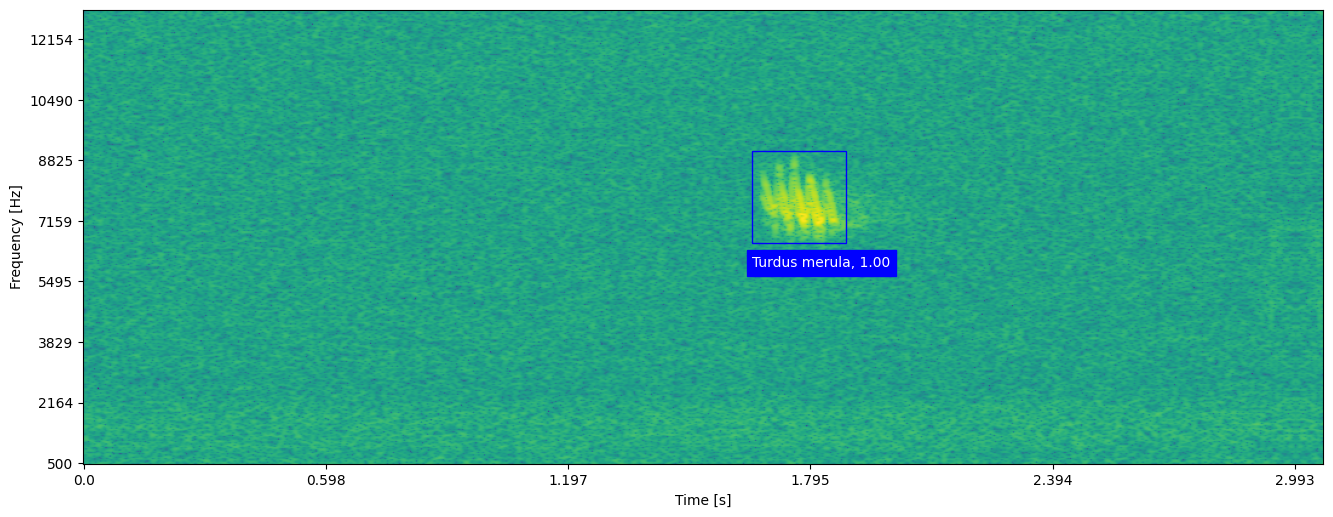

In [9]:
### Visualisation des résultats
class_bbox = merge_images(fp, outputs, config.num_classes)
output = {reverse_dict[idx]: {key: value.cpu().numpy().tolist() for key, value in class_bbox[str(idx)].items()} for idx in range(1, len(class_bbox) + 1) if len(class_bbox[str(idx)]['bbox_coord']) > 0}
visualise_model_out(output, fp, spectrogram, reverse_dict)

In [11]:
output

{'Turdus merula': {'bbox_coord': [[552, 182, 629, 258]],
  'scores': [0.9958592057228088]}}

In [10]:
birds_dict

{'Grus grus': 1,
 'Haematopus ostralegus': 2,
 'Anthus trivialis': 3,
 'Turdus iliacus': 4,
 'Turdus philomelos': 5,
 'Strix aluco': 6,
 'Motacilla flava': 7,
 'Vanellus vanellus': 8,
 'Ficedula hypoleuca': 9,
 'Erithacus rubecula': 10,
 'Emberiza hortulana': 11,
 'Gallinula chloropus': 12,
 'Alauda arvensis': 14,
 'Actitis hypoleucos': 15,
 'Muscicapa striata': 16,
 'Anas platyrhynchos': 17,
 'Burhinus oedicnemus': 18,
 'Fulica atra': 19,
 'Turdus merula': 20,
 'Branta bernicla': 21,
 'Pluvialis apricaria': 22,
 'Branta canadensis': 23,
 'Athene noctua': 24,
 'Tachybaptus ruficollis': 25,
 'Chroicocephalus ridibundus': 26,
 'Ardea cinerea': 27,
 'Corvus corone': 28,
 'Charadrius hiaticula': 29,
 'Numenius phaeopus': 30,
 'Charadrius morinellus': 31,
 'Calidris alpina': 32,
 'Coturnix coturnix': 34,
 'Tyto alba': 35,
 'Anthus pratensis': 36,
 'Otus scops': 37,
 'Tringa ochropus': 38,
 'Phasianus colchicus': 39,
 'Tringa totanus': 40,
 'Tringa nebularia': 41,
 'Fringilla coelebs': 42,
 